In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
%matplotlib inline

train_data1 = pd.read_csv('./BATADAL_dataset03.csv', sep = ',')
train_data2 = pd.read_csv('./BATADAL_dataset04.csv', sep = ', ')
test_data = pd.read_csv('./BATADAL_test_dataset.csv', sep = ',')

print("Shape non-attack: ", train_data1.shape)
print("Shape train: ", train_data2.shape)
print("Shape test: ", test_data.shape)

# All numeric values except from the first (datetime)
# print(train_data1.columns.values)

# convert DATETIME to timestamp
train_data = pd.concat([train_data1, train_data2], axis=0, ignore_index=True)
train_data['DATETIME'] = pd.to_datetime(train_data['DATETIME'], infer_datetime_format=True)
train_data['Year'] = train_data['DATETIME'].apply(lambda x: x.year)
train_data['Month'] = train_data['DATETIME'].apply(lambda x: x.month)
train_data['Day'] = train_data['DATETIME'].apply(lambda x: x.day)
train_data['Hour'] = train_data['DATETIME'].apply(lambda x: x.hour)

test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'], infer_datetime_format=True)
test_data['Year'] = test_data['DATETIME'].apply(lambda x: x.year)
test_data['Month'] = test_data['DATETIME'].apply(lambda x: x.month)
test_data['Day'] = test_data['DATETIME'].apply(lambda x: x.day)
test_data['Hour'] = test_data['DATETIME'].apply(lambda x: x.hour)

# Final versions of training and test dataframes
y = train_data['ATT_FLAG'].values
train_data = train_data.drop(columns=['DATETIME', 'ATT_FLAG'])
test_data = test_data.drop(columns=['DATETIME'])

# Training and test dataset
X = train_data.values
X_test = test_data.values

# drop columns with 0 variance as they can be of no use
index = np.std(X, axis=0) != 0
X = X[:, index]

# separate the two training datasets again
X1 = X[:8761]
X2 = X[8761:]
y1 = y[:8761]
y2 = y[8761:]

# NaNs
print("Number of NaN values in training dataset: ", np.sum(pd.isna(train_data).values))
print("Number of NaN values in test dataset: ", np.sum(pd.isna(train_data).values))


print("Training dataset shape: ", X.shape)
print("Number of attacks: ", np.sum(y==1))

C:\Users\Kon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


Shape non-attack:  (8761, 45)
Shape train:  (4177, 45)
Shape test:  (2089, 44)
Number of NaN values in training dataset:  0
Number of NaN values in test dataset:  0
Training dataset shape:  (12938, 40)
Number of attacks:  219


In [3]:
normalize = StandardScaler()
X_norm =  normalize.fit_transform(X)

In [6]:
pca = PCA(n_components= X_norm.shape[1])
X_pca = pca.fit_transform(X_norm)
X_pca.shape
X_inv = pca.inverse_transform(X_pca)


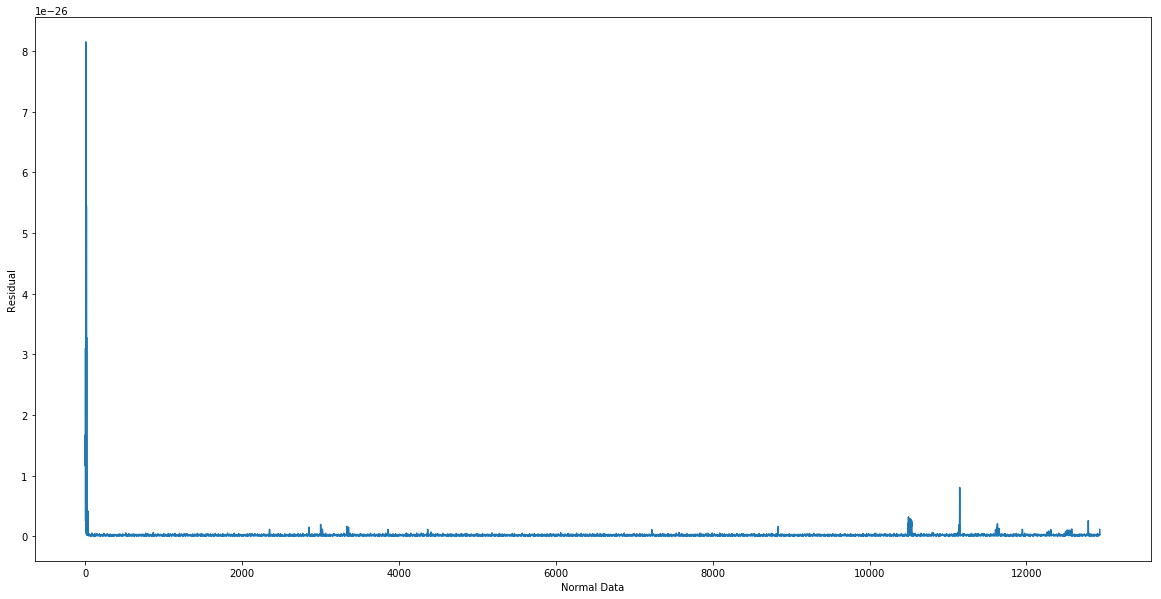

<Figure size 1440x720 with 0 Axes>

In [9]:

res0 = X_norm - X_inv
res1 = np.square(res_1)
res = res1.sum( axis=1 )

#detecting Anomalies in the data
figure, ax = plt.subplots(figsize=[20,10])
plt.xlabel('Normal Data')
plt.ylabel('Residual')
plt.figure(figsize=[20,10])
ax.plot(res)

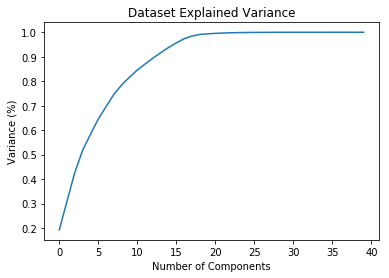

In [10]:
pca = PCA().fit(X_norm)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [11]:
# thelei allagh 
def optimal_components(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray
print(X_norm.shape)

num,sortArray = optimal_components(pca.explained_variance_,0.99)
print('Number of principle component:',num)         

(12938, 40)
Number of principle component: 19


In [12]:
pca = PCA(n_components=num)
X_PCA2 = pca.fit_transform(X_norm)
X_PCA2.shape
X_INV2 = pca.inverse_transform(X_PCA2)

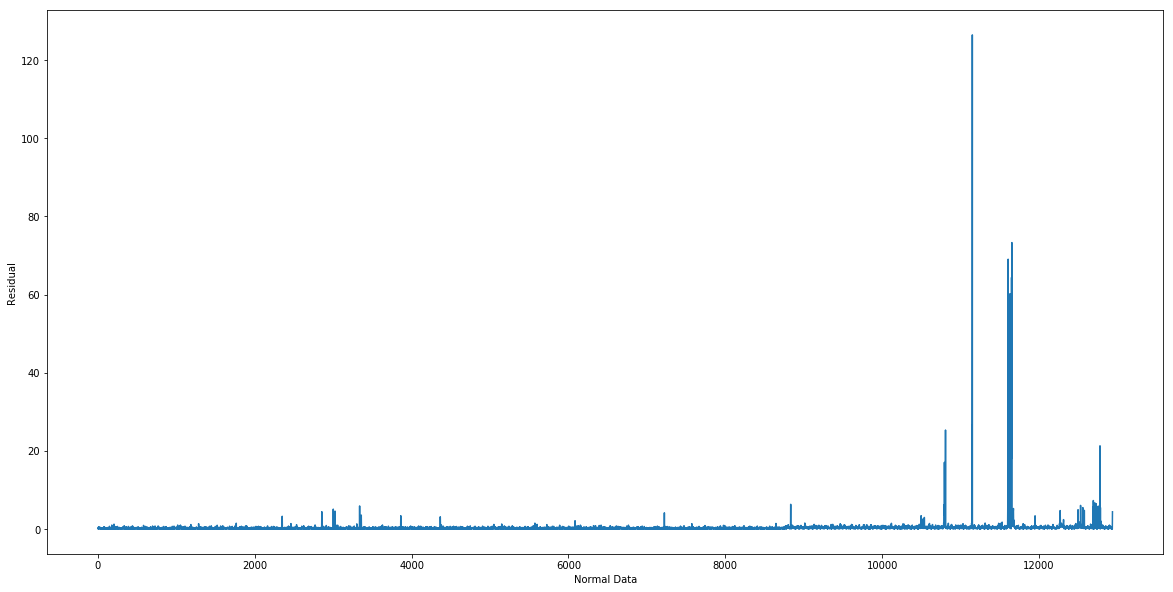

<Figure size 1440x720 with 0 Axes>

In [15]:
res_1 = X_norm - X_INV2
res_2 = np.square(res_1)
respc = res_2.sum(axis=1)


#detecting Anomalies in the data
figure, ax = plt.subplots(figsize=[20,10])
plt.xlabel('Normal Data')
plt.ylabel('Residual')
plt.figure(figsize=[20,10])
ax.plot(respc)

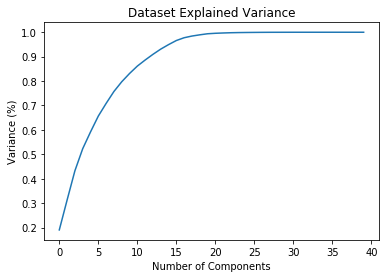

In [35]:
#Clean Data 
normalize = StandardScaler()
X2_norm =  normalize.fit_transform(X2)

pca = PCA().fit(X2_norm)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()



In [36]:

pca = PCA(n_components= X2_norm.shape[1])
X2_pca = pca.fit_transform(X2_norm)
X2_pca.shape
X2_inv = pca.inverse_transform(X2_pca)

def optimal_components(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray
print(X1_norm.shape)

num1,sortArray1 = optimal_components(pca.explained_variance_,0.99)
print('Number of principle component:',num1)    

(8761, 40)
Number of principle component: 20


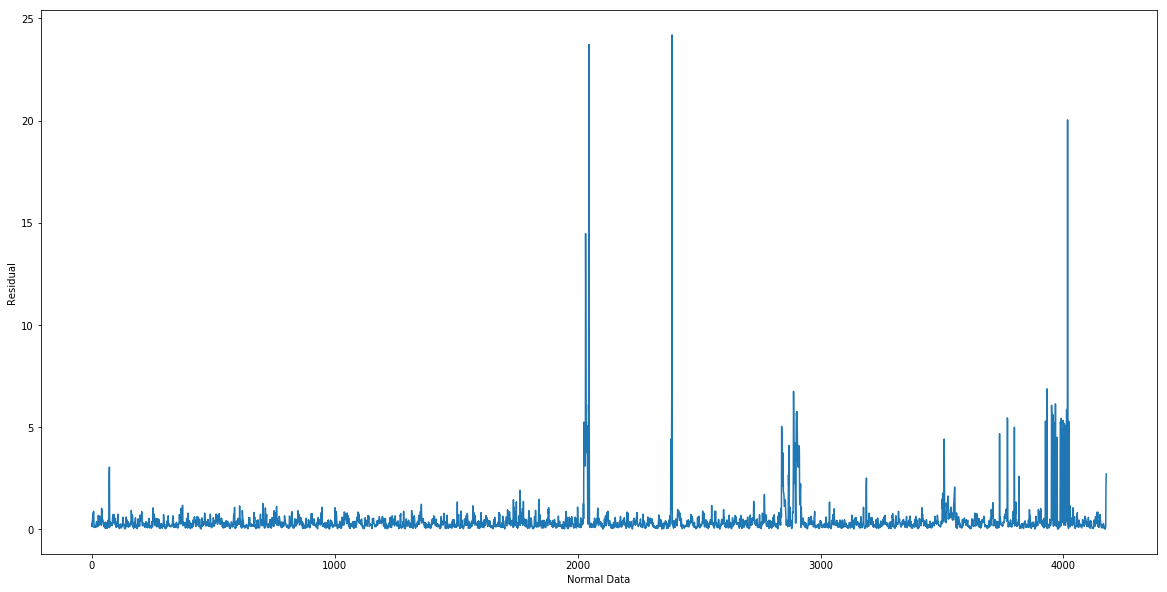

<Figure size 1440x720 with 0 Axes>

In [37]:
pca = PCA(n_components=num)
X1_PCA2 = pca.fit_transform(X2_norm)
X1_PCA2.shape
X1_INV2 = pca.inverse_transform(X1_PCA2)

resx1 = X2_norm - X1_INV2
resx12 = np.square(resx1)
respc1 = resx12.sum(axis=1)


#detecting Anomalies in the data
figure, ax = plt.subplots(figsize=[20,10])
plt.xlabel('Normal Data')
plt.ylabel('Residual')
plt.figure(figsize=[20,10])
ax.plot(respc1)